In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys
sys.path.append('C:/Users/Owner/Downloads/dhs_service_records_synthesized_final.csv/')  # Adjust the path to where dhs_util.py is located

import dhs_util
from dhs_util import *

# Change to the directory where the file is located
os.chdir('C:/Users/Owner/Downloads/dhs_service_records_synthesized_final.csv/')

# Load the dataset and apply the necessary functions
df = pd.read_csv('dhs_service_records_synthesized_final.csv')
df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)

# Get recipient attributes
recipient = get_recipient_attribute(df)

In [2]:
### LN03 In-Class Exercises

# Top services by number of unique recipients
top_services_by_recipients = df.groupby('service')['id'].nunique().sort_values(ascending=False)
print(top_services_by_recipients)

# Top services by total usage months
top_services_by_usage = df.groupby('service').size().sort_values(ascending=False)
print(top_services_by_usage)

def compute_service_attributes(df):
    # Group by 'service' and compute various attributes
    service_attributes = df.groupby('service').agg(
        total_recipients=('id', 'nunique'),  # Unique recipients per service
        total_usage=('id', 'size'),  # Total usage count
        avg_age=('age', 'mean'),  # Average age of recipients
        gender_diversity=('gender', 'nunique'),  # Number of unique genders using the service
        race_diversity=('race', 'nunique'),  # Number of unique races using the service
        avg_usage_per_recipient=('id', lambda x: len(x) / x.nunique())  # Avg number of usages per recipient
    )
    
    return service_attributes

service_attributes_df = compute_service_attributes(df)
print(service_attributes_df)

# Without reset_index()
aggregated_without_reset = df.groupby('service').agg(total_recipients=('id', 'nunique'))
print(aggregated_without_reset.head())

# With reset_index()
aggregated_with_reset = df.groupby('service').agg(total_recipients=('id', 'nunique')).reset_index()
print(aggregated_with_reset.head())


C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\812095363.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_services_by_recipients = df.groupby('service')['id'].nunique().sort_values(ascending=False)


service
Individuals_Receiving_Income_Supports                         502530
Individuals_Receiving_DHS_Services                             82122
Individuals_Receiving_Mental_Health_Services                   55263
Individuals_Receiving_Homelessness_and_Housing_Services        21823
Older_Adults_Receiving_Services                                16759
Individuals_Receiving_Substance_Use_Disorder_Services          12812
Children_Receiving_Child_Welfare_Services                       7306
Mental_Health_Crises                                            7245
Parents_Receiving_Child_Welfare_Services                        7078
Jail_Population                                                 6922
Children_Receiving_Early_Intervention_Services                  6752
Individuals_Receiving_Intellectual_Disability_Services          6360
Involuntary_Commitments                                         5010
Homeless_Population                                             3415
Families_Receiving_Child_W

C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\812095363.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_services_by_usage = df.groupby('service').size().sort_values(ascending=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\812095363.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_attributes = df.groupby('service').agg(


                                                    total_recipients  \
service                                                                
Children_Attending_Early_Childhood_Programs_Man...               349   
Children_Receiving_Child_Welfare_Services                       7306   
Children_Receiving_DHS_Funded_Out_of_School_Pro...              1198   
Children_Receiving_Early_Intervention_Services                  6752   
Children_in_Care                                                2237   
Families_Receiving_Child_Welfare_Services                       3118   
Homeless_Population                                             3415   
Homicides                                                        172   
Individuals_Receiving_DHS_Services                             82122   
Individuals_Receiving_Family_Strengthening_Prog...              2986   
Individuals_Receiving_Homelessness_and_Housing_...             21823   
Individuals_Receiving_Income_Supports                         50

C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\812095363.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_without_reset = df.groupby('service').agg(total_recipients=('id', 'nunique'))


                                                    total_recipients
service                                                             
Children_Attending_Early_Childhood_Programs_Man...               349
Children_Receiving_Child_Welfare_Services                       7306
Children_Receiving_DHS_Funded_Out_of_School_Pro...              1198
Children_Receiving_Early_Intervention_Services                  6752
Children_in_Care                                                2237


C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\812095363.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_with_reset = df.groupby('service').agg(total_recipients=('id', 'nunique')).reset_index()


                                             service  total_recipients
0  Children_Attending_Early_Childhood_Programs_Ma...               349
1          Children_Receiving_Child_Welfare_Services              7306
2  Children_Receiving_DHS_Funded_Out_of_School_Pr...              1198
3     Children_Receiving_Early_Intervention_Services              6752
4                                   Children_in_Care              2237


Total recipients who received Substance Use Disorder Services (S15): 12812
Total recipients who used only one service: 424468
Total recipients who received only Substance Use Disorder Services (S15): 38
Total recipients who received Mental Health Service (S14): 55263
Total recipients who received both Mental Health (S14) and Substance Use Disorder Services (S15): 5278
Total recipients who received Substance Use Disorder Services (S15) but NOT Mental Health (S14): 7496
Demographics of those who received only Substance Use Disorder Services (S15): 
                  id  num_service  distinct_service  \
count      38.000000    38.000000              38.0   
mean   235869.210526     3.526316               1.0   
min     28815.000000     1.000000               1.0   
25%     96956.250000     1.000000               1.0   
50%    178271.500000     1.000000               1.0   
75%    360902.500000     4.000000               1.0   
max    532241.000000    12.000000               1.0   
std    

C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\1607186863.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_services = df[df['id'].isin(cohort_ids)].groupby('serv').agg(
C:\Users\Owner\AppData\Local\Temp\ipykernel_13852\1607186863.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_services = df[df['id'].isin(cohort_ids)].groupby('serv').agg(


Common services used by recipients who received both S14 and S15: 
      total_recipients  total_usage
serv                               
S09               5278        51196
S14               5278        30518
S15               5278        31561
S12               4987        57784
S17               1058         4510


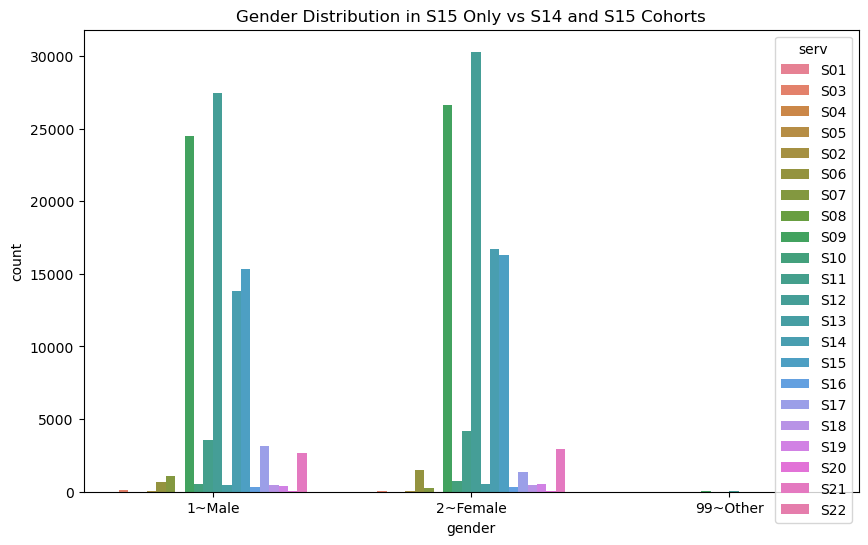

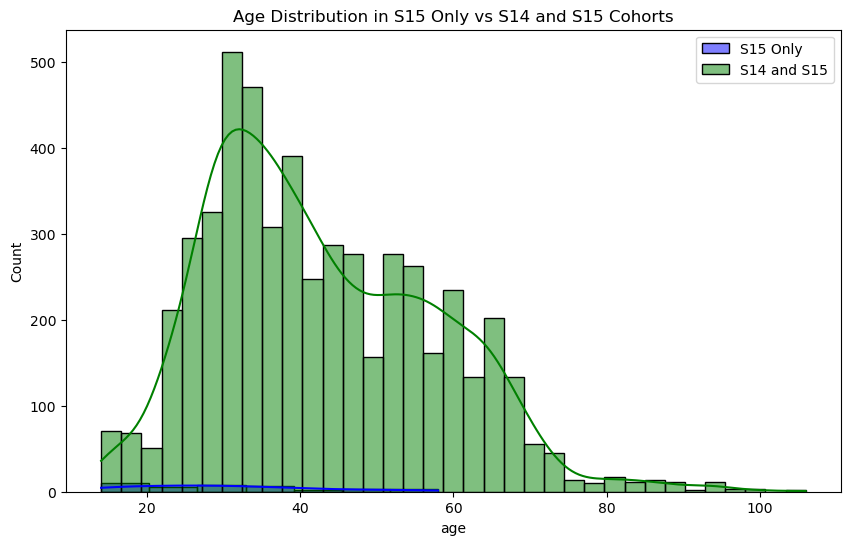

In [25]:

# Recipients who received Substance Use Disorder Services (S15)
s15_id = df.query("serv == 'S15'")['id'].unique()
print(f"Total recipients who received Substance Use Disorder Services (S15): {len(s15_id)}")

# Recipients who used only one service (filtering the recipient dataset)
one_serv_id = recipient.query("distinct_service == 1").id.to_list()
print(f"Total recipients who used only one service: {len(one_serv_id)}")

# Recipients who received ONLY Substance Use Disorder Services (S15)
s15_only = list(set(s15_id) & set(one_serv_id))
print(f"Total recipients who received only Substance Use Disorder Services (S15): {len(s15_only)}")

# Recipients who received Mental Health Service (S14)
s14_id = df.query("serv == 'S14'")['id'].unique()
print(f"Total recipients who received Mental Health Service (S14): {len(s14_id)}")

# Recipients who received both Mental Health (S14) AND Substance Use Disorder Services (S15)
s14_s15 = list(set(s14_id) & set(s15_id))
print(f"Total recipients who received both Mental Health (S14) and Substance Use Disorder Services (S15): {len(s14_s15)}")

# Recipients who received ONLY Substance Use Disorder Services (S15) and NOT Mental Health (S14)
s_15 = list(set(s15_id) - set(s14_s15) - set(s15_only))
print(f"Total recipients who received Substance Use Disorder Services (S15) but NOT Mental Health (S14): {len(s_15)}")

# Let's now analyze these cohorts further to understand their demographics and similarities
# Merging demographic data (age, gender, race, etc.) from recipient dataset for each cohort

# Cohort: Only S15 (Income Support)
s15_only_df = recipient[recipient.id.isin(s15_only)]
print(f"Demographics of those who received only Substance Use Disorder Services (S15): \n{s15_only_df.describe()}")

# Cohort: S14 and S15
s14_s15_df = recipient[recipient.id.isin(s14_s15)]
print(f"Demographics of those who received both Mental Health (S14) and Substance Use Disorder Services(S15): \n{s14_s15_df.describe()}")

# Cohort: Only S15, but NOT S14
s_15_df = recipient[recipient.id.isin(s_15)]
print(f"Demographics of those who received Substance Use Disorder Services(S15) but NOT Mental Health (S14): \n{s_15_df.describe()}")

# Common services used by the cohorts (beyond S14 and S15)
def cohort_service_usage(cohort_ids):
    cohort_services = df[df['id'].isin(cohort_ids)].groupby('serv').agg(
        total_recipients=('id', 'nunique'),
        total_usage=('id', 'count')
    ).sort_values(by='total_recipients', ascending=False)
    return cohort_services

# Service usage for S15 only cohort
s15_only_services = cohort_service_usage(s15_only)
print(f"Common services used by recipients who received only S15: \n{s15_only_services.head()}")

# Service usage for S14 and S15 cohort
s14_s15_services = cohort_service_usage(s14_s15)
print(f"Common services used by recipients who received both S14 and S15: \n{s14_s15_services.head()}")

# Comparing demographic differences between cohorts
# Gender distribution comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='serv', data=df[df['id'].isin(s15_only + s14_s15)])
plt.title('Gender Distribution in S15 Only vs S14 and S15 Cohorts')
plt.show()

# Age distribution comparison
plt.figure(figsize=(10, 6))
sns.histplot(s15_only_df['age'], color='blue', label='S15 Only', kde=True)
sns.histplot(s14_s15_df['age'], color='green', label='S14 and S15', kde=True)
plt.title('Age Distribution in S15 Only vs S14 and S15 Cohorts')
plt.legend()
plt.show()

In [23]:
# Display unique service IDs along with their associated service names
unique_services = df[['serv', 'service']].drop_duplicates()

# View the result
print(unique_services)


        serv                                            service
0        S01  Children_Attending_Early_Childhood_Programs_Ma...
2302     S02                                   Children_in_Care
20744    S03          Children_Receiving_Child_Welfare_Services
71117    S04  Children_Receiving_DHS_Funded_Out_of_School_Pr...
75723    S05     Children_Receiving_Early_Intervention_Services
121646   S06          Families_Receiving_Child_Welfare_Services
145119   S07                                Homeless_Population
159069   S08                                          Homicides
159241   S09                 Individuals_Receiving_DHS_Services
785963   S10  Individuals_Receiving_Family_Strengthening_Pro...
814073   S11  Individuals_Receiving_Homelessness_and_Housing...
963041   S12              Individuals_Receiving_Income_Supports
6414034  S13  Individuals_Receiving_Intellectual_Disability_...
6488179  S14       Individuals_Receiving_Mental_Health_Services
6812420  S15  Individuals_Receiving_Subs